In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

from utils.cross_validation import cross_validate
from utils.metrics import aucroc
from utils.estimators import DecisionTreeWrapper
from utils.base_set import X_train, y_train, seed

### Decision Tree

In [2]:
mean_val_scores = []
std_val_scores = []
mean_train_scores = []
std_train_scores = []

best_params = {'criterion': 'entropy', 'max_features': 135} # based on ej. 3
k = 5
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
cols_val = [f"split_val_{i}" for i in range(k)]
cols_train = [f"split_train_{i}" for i in range(k)]
max_depth_values = range(1, 15)
for max_depth in max_depth_values:
    tree = DecisionTreeWrapper(max_depth=max_depth, random_state=seed, **best_params)
    auc_scores, _ = cross_validate(tree, X_train, y_train, metric=aucroc, use_decision=True, cv=cv)
    mean_val_scores.append(auc_scores.mean_val.aucroc)
    std_val_scores.append(auc_scores[cols_val].std(axis=1).aucroc)
    mean_train_scores.append(auc_scores.mean_train.aucroc)
    std_train_scores.append(auc_scores[cols_train].std(axis=1).aucroc)

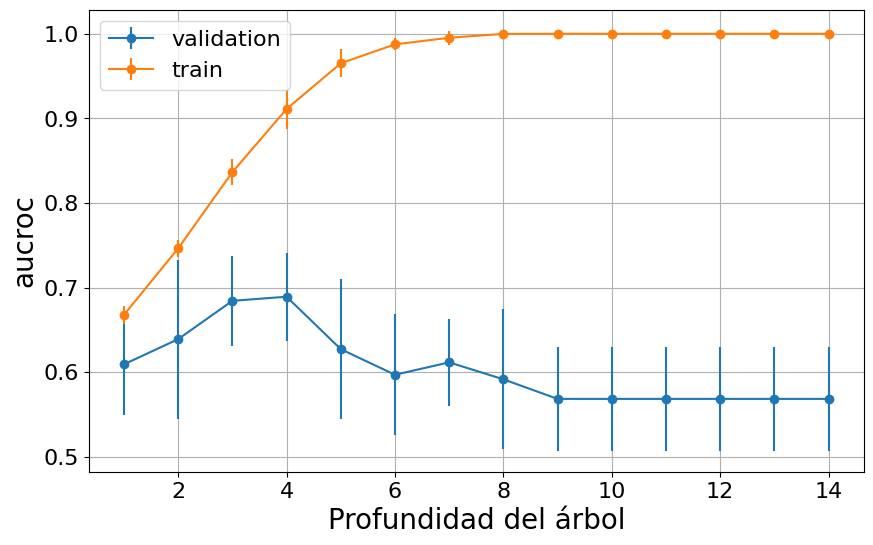

In [8]:
plt.figure(figsize=(10, 6))
plt.errorbar(max_depth_values, mean_val_scores, std_val_scores, fmt='-o', label="validation")
plt.errorbar(max_depth_values, mean_train_scores, std_train_scores, fmt='-o', label="train")
plt.legend(fontsize=16)
plt.xlabel('Profundidad del árbol', fontsize=20)
plt.ylabel('aucroc', fontsize=20)
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
# plt.title('Curva de Complejidad para Árbol de Decisión (criterion=Entropy)')
plt.grid(True)
plt.show()